## Customer Churn Prediction Using Artificial Neural Network (ANN)
Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Load the data

In [2]:
df = pd.read_csv("D:/DataAnalysis/Python/DeepLearning/ChurnPrediction/customer_churn.csv")
# Displaying any random 5 samples
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2217,0839-JTCUD,Female,0,Yes,Yes,66,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.90,5958.85,No
3849,5089-IFSDP,Female,0,Yes,No,58,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.45,6144.55,Yes
5405,4097-YODCF,Male,0,No,Yes,34,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,103.80,3470.8,No
3235,4825-XJGDM,Female,0,No,No,61,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Credit card (automatic),43.70,2696.55,No
2916,4139-JPIAM,Male,0,No,No,51,No,No phone service,DSL,Yes,...,No,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),44.45,2181.55,No


### Data Cleaning
#### First of all, drop customerID column as it is of no use

In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Quick glance at above makes us realize that TotalCharges should be float but it is an object. Let's check what's going on with this column

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

#### So we can see, its string, so converting TotalCharges to int column

In [7]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

#### So, as can be seen, some values seems to be not numbers but blank string. Let's find out such rows

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.shape

(7043, 20)

In [11]:
df.iloc[488].TotalCharges

' '

In [12]:
df[df.TotalCharges!=' '].shape

(7032, 20)

#### Dropping/Removing rows with space in TotalCharges

In [14]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [15]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\abhij\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

### Data Visualization

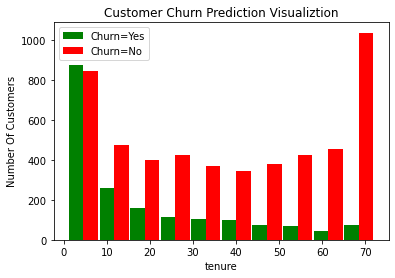

In [32]:
# Tenure  VS Churn

tenure_churn_no = df2[df2.Churn==0].tenure
tenure_churn_yes = df2[df2.Churn==1].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

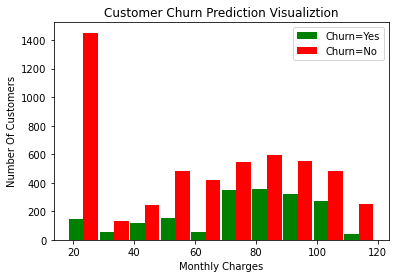

In [33]:
# Monthly Charges VS Churn

mc_churn_no = df2[df2.Churn==0].MonthlyCharges      
mc_churn_yes = df2[df2.Churn==1].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

### Data PreProcessing

#### Lets explore unique data values in every columns

In [18]:
#Function to show "column name followed by the unique values present in that column"
for column in df1:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

#### Many of the columns consists of unique values as yes, no etc., numeric columns looks good, so filtering out only object columns to explore more.

In [19]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [20]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


#### Some of the columns(such as 'MultipleLines' , 'OnlineSecurity' etc.) have no internet service or no phone service, that can be replaced with a simple "No"

In [21]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\abhij\Anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


#### Convert Yes and No to 1 or 0 respectively

In [23]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\abhij\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [24]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [25]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [26]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


#### One hot encoding for categorical columns

In [28]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])

In [29]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6280,1,0,0,1,23,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2658,1,0,1,1,14,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1988,0,1,1,0,58,1,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0
6612,0,0,1,1,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
6143,0,0,1,1,50,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [30]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [34]:
# Scaling

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [35]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

#### Train test split

In [36]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [37]:
X_train.shape

(5625, 26)

In [38]:
X_test.shape

(1407, 26)

In [39]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [40]:
len(X_train.columns)

26

#### Build a model (ANN) in tensorflow/keras

In [41]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 726us/step - loss: 0.5488 - accuracy: 0.7090
Epoch 2/100
176/176 [==============================] - 0s 580us/step - loss: 0.4303 - accuracy: 0.7957
Epoch 3/100
176/176 [==============================] - 0s 563us/step - loss: 0.4199 - accuracy: 0.7980
Epoch 4/100
176/176 [==============================] - 0s 579us/step - loss: 0.4141 - accuracy: 0.8062
Epoch 5/100
176/176 [==============================] - 0s 680us/step - loss: 0.4121 - accuracy: 0.8062
Epoch 6/100
176/176 [==============================] - 0s 765us/step - loss: 0.4096 - accuracy: 0.8105
Epoch 7/100
176/176 [==============================] - 0s 790us/step - loss: 0.4078 - accuracy: 0.8091
Epoch 8/100
176/176 [==============================] - 0s 711us/step - loss: 0.4062 - accuracy: 0.8103
Epoch 9/100
176/176 [==============================] - 0s 568us/step - loss: 0.4045 - accuracy: 0.8087
Epoch 10/100
176/176 [==============================] - 0s 629us/step - l

In [42]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 526us/step - loss: 0.4891 - accuracy: 0.7726


[0.489101767539978, 0.7725657224655151]

In [43]:
yp = model.predict(X_test)
yp[:5]

array([[0.30100006],
       [0.7134976 ],
       [0.00828838],
       [0.8002993 ],
       [0.44357732]], dtype=float32)

In [44]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [45]:
y_pred[:5]

[0, 1, 0, 1, 0]

In [46]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [47]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       999
           1       0.62      0.57      0.59       408

    accuracy                           0.77      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.77      0.77      0.77      1407



#### Confusion Matrix

Text(69.0, 0.5, 'Truth')

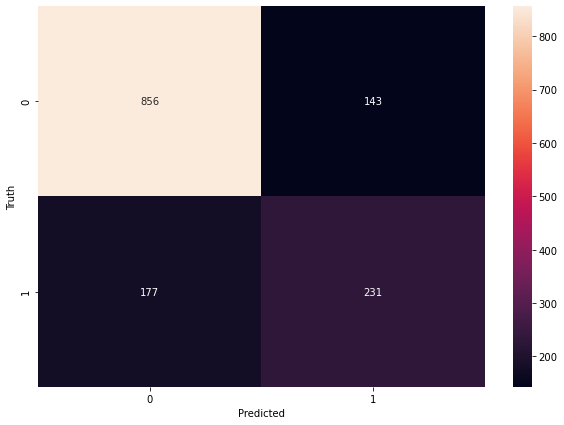

In [48]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Accuracy 

In [50]:
round((856+231)/(856+231+177+143),2)

0.77

#### Precision for 0 class. i.e. Precision for customers who did not churn/leave the organization

In [51]:
round(856/(856+177),2)

0.83

#### Precision for 1 class. i.e. Precision for customers who actually churned

In [52]:
round(231/(231+143),2)

0.62

#### Recall for 0 class

In [53]:
round(856/(856+143),2)

0.86

#### Recall for 1 class

In [54]:
round(231/(231+177),2)

0.57

## Handling imbalanced data in customer churn prediction
We will try to handling imbalance in data using various techniques to improve f1-score

#### Loading Churn model as written above and wrapping it around a function so as call it during every technique

In [57]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [58]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 0s 622us/step - loss: 0.5109 - accuracy: 0.7513
Epoch 2/100
176/176 [==============================] - 0s 717us/step - loss: 0.4300 - accuracy: 0.7952
Epoch 3/100
176/176 [==============================] - 0s 719us/step - loss: 0.4204 - accuracy: 0.7968
Epoch 4/100
176/176 [==============================] - 0s 783us/step - loss: 0.4160 - accuracy: 0.8028
Epoch 5/100
176/176 [==============================] - 0s 750us/step - loss: 0.4135 - accuracy: 0.8028
Epoch 6/100
176/176 [==============================] - 0s 762us/step - loss: 0.4107 - accuracy: 0.8080
Epoch 7/100
176/176 [==============================] - 0s 577us/step - loss: 0.4090 - accuracy: 0.8057
Epoch 8/100
176/176 [==============================] - 0s 655us/step - loss: 0.4082 - accuracy: 0.8066
Epoch 9/100
176/176 [==============================] - 0s 638us/step - loss: 0.4051 - accuracy: 0.8098
Epoch 10/100
176/176 [==============================] - 0s 543us/step - l

### Mitigating Skewdness of Data

#### Method 1: Undersampling

In [59]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

print(count_class_0)
print(count_class_1)

5163
1869


In [62]:
# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [64]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [65]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

# Stratify makes sure to split equal samples of both classes in training data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [66]:
# Number of classes in training Data
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

#### Printing Classification in the last, Scroll down till the last epoch to watch the classification report

In [67]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 513us/step - loss: 0.5952 - accuracy: 0.7117
Epoch 2/100
94/94 [==============================] - 0s 724us/step - loss: 0.5057 - accuracy: 0.7538
Epoch 3/100
94/94 [==============================] - 0s 780us/step - loss: 0.4904 - accuracy: 0.7619
Epoch 4/100
94/94 [==============================] - 0s 789us/step - loss: 0.4836 - accuracy: 0.7679
Epoch 5/100
94/94 [==============================] - 0s 864us/step - loss: 0.4787 - accuracy: 0.7682
Epoch 6/100
94/94 [==============================] - 0s 760us/step - loss: 0.4751 - accuracy: 0.7686
Epoch 7/100
94/94 [==============================] - 0s 829us/step - loss: 0.4725 - accuracy: 0.7696
Epoch 8/100
94/94 [==============================] - 0s 679us/step - loss: 0.4711 - accuracy: 0.7706
Epoch 9/100
94/94 [==============================] - 0s 710us/step - loss: 0.4689 - accuracy: 0.7726
Epoch 10/100
94/94 [==============================] - 0s 646us/step - loss: 0.4657 - accura

#### Check classification report above. f1-score for minority class "1" improved from 0.56 to 0.74. f1-Score for class "0" reduced to 0.72 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

#### Method2: Oversampling

In [68]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [69]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [70]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [71]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 0s 700us/step - loss: 0.5558 - accuracy: 0.7270
Epoch 2/100
259/259 [==============================] - 0s 517us/step - loss: 0.4908 - accuracy: 0.7623
Epoch 3/100
259/259 [==============================] - 0s 538us/step - loss: 0.4854 - accuracy: 0.7625
Epoch 4/100
259/259 [==============================] - 0s 544us/step - loss: 0.4805 - accuracy: 0.7644
Epoch 5/100
259/259 [==============================] - 0s 576us/step - loss: 0.4785 - accuracy: 0.7663
Epoch 6/100
259/259 [==============================] - 0s 876us/step - loss: 0.4761 - accuracy: 0.7682
Epoch 7/100
259/259 [==============================] - 0s 834us/step - loss: 0.4748 - accuracy: 0.7695
Epoch 8/100
259/259 [==============================] - 0s 611us/step - loss: 0.4729 - accuracy: 0.7717
Epoch 9/100
259/259 [==============================] - 0s 609us/step - loss: 0.4710 - accuracy: 0.7688
Epoch 10/100
259/259 [==============================] - 0s 488us/step - l

#### Check classification report above. f1-score for minority class 1 improved from 0.56 to 0.81. f1-Score for class 0 reduced to 0.78 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

#### Method3: SMOTE
To install imbalanced-learn library use pip install imbalanced-learn command

In [73]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [74]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [77]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [78]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 0s 543us/step - loss: 0.5331 - accuracy: 0.7410
Epoch 2/100
259/259 [==============================] - 0s 540us/step - loss: 0.4659 - accuracy: 0.7755
Epoch 3/100
259/259 [==============================] - 0s 549us/step - loss: 0.4575 - accuracy: 0.7817
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.7849
Epoch 5/100
259/259 [==============================] - 0s 946us/step - loss: 0.4476 - accuracy: 0.7872
Epoch 6/100
259/259 [==============================] - 0s 684us/step - loss: 0.4434 - accuracy: 0.7909
Epoch 7/100
259/259 [==============================] - 0s 497us/step - loss: 0.4399 - accuracy: 0.7913
Epoch 8/100
259/259 [==============================] - 0s 550us/step - loss: 0.4354 - accuracy: 0.7948
Epoch 9/100
259/259 [==============================] - 0s 744us/step - loss: 0.4306 - accuracy: 0.8010
Epoch 10/100
259/259 [==============================] - 0s 957us/step - los

#### SMOT Oversampling increases f1 score of minority class 1 from 0.56 to 0.82 (huge improvement) Also over all accuracy improves from 0.77 to 0.81

#### Method4: Use of Ensemble with undersampling

In [79]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [80]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [82]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

#### Distributing the samples for each batches as follows:

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [84]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [85]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [86]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [87]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [88]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 519us/step - loss: 0.6726 - accuracy: 0.6154
Epoch 2/100
94/94 [==============================] - 0s 545us/step - loss: 0.5395 - accuracy: 0.7482
Epoch 3/100
94/94 [==============================] - 0s 492us/step - loss: 0.4989 - accuracy: 0.7659
Epoch 4/100
94/94 [==============================] - 0s 518us/step - loss: 0.4914 - accuracy: 0.7656
Epoch 5/100
94/94 [==============================] - 0s 572us/step - loss: 0.4865 - accuracy: 0.7652
Epoch 6/100
94/94 [==============================] - 0s 526us/step - loss: 0.4816 - accuracy: 0.7719
Epoch 7/100
94/94 [==============================] - 0s 532us/step - loss: 0.4796 - accuracy: 0.7706
Epoch 8/100
94/94 [==============================] - 0s 505us/step - loss: 0.4780 - accuracy: 0.7726
Epoch 9/100
94/94 [==============================] - 0s 544us/step - loss: 0.4759 - accuracy: 0.7759
Epoch 10/100
94/94 [==============================] - 0s 649us/step - loss: 0.4746 - accura

In [89]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 544us/step - loss: 0.6489 - accuracy: 0.6194
Epoch 2/100
94/94 [==============================] - 0s 514us/step - loss: 0.5188 - accuracy: 0.7595
Epoch 3/100
94/94 [==============================] - 0s 572us/step - loss: 0.4945 - accuracy: 0.7622
Epoch 4/100
94/94 [==============================] - 0s 635us/step - loss: 0.4861 - accuracy: 0.7666
Epoch 5/100
94/94 [==============================] - 0s 548us/step - loss: 0.4820 - accuracy: 0.7679
Epoch 6/100
94/94 [==============================] - 0s 853us/step - loss: 0.4794 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 845us/step - loss: 0.4769 - accuracy: 0.7699
Epoch 8/100
94/94 [==============================] - 0s 870us/step - loss: 0.4753 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 938us/step - loss: 0.4731 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 0s 968us/step - loss: 0.4719 - accura

In [90]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 601us/step - loss: 0.5997 - accuracy: 0.6998
Epoch 2/100
83/83 [==============================] - 0s 528us/step - loss: 0.5048 - accuracy: 0.7613
Epoch 3/100
83/83 [==============================] - 0s 563us/step - loss: 0.4888 - accuracy: 0.7685
Epoch 4/100
83/83 [==============================] - 0s 556us/step - loss: 0.4822 - accuracy: 0.7727
Epoch 5/100
83/83 [==============================] - 0s 539us/step - loss: 0.4772 - accuracy: 0.7734
Epoch 6/100
83/83 [==============================] - 0s 560us/step - loss: 0.4739 - accuracy: 0.7750
Epoch 7/100
83/83 [==============================] - 0s 575us/step - loss: 0.4708 - accuracy: 0.7757
Epoch 8/100
83/83 [==============================] - 0s 652us/step - loss: 0.4703 - accuracy: 0.7810
Epoch 9/100
83/83 [==============================] - 0s 879us/step - loss: 0.4676 - accuracy: 0.7852
Epoch 10/100
83/83 [==============================] - 0s 981us/step - loss: 0.4661 - accura

In [93]:
print(len(y_pred1))
print(len(y_pred2))
print(len(y_pred3))

1407
1407
1407


#### Selecting the majority of the vote from the 3 models i.e. if the summation of any sample's predcition (by all three models) is greater than 1, then the majority O/P is 1, else 0

In [94]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [95]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1033
           1       0.48      0.81      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.72      0.74      1407



#### f1-score for minority class 1 improved to 0.56 from 0.61. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes